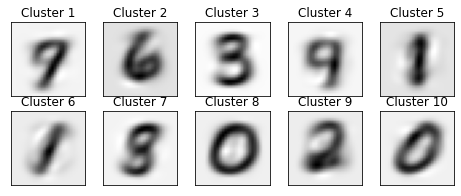

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Apply k-means clustering on the reduced dataset
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_pca)

# Visualize the clusters
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.inverse_transform(kmeans.cluster_centers_[i]).reshape(28, 28), cmap='binary')
    ax.set_title(f'Cluster {i+1}')
    ax.set(xticks=[], yticks=[])

plt.show()

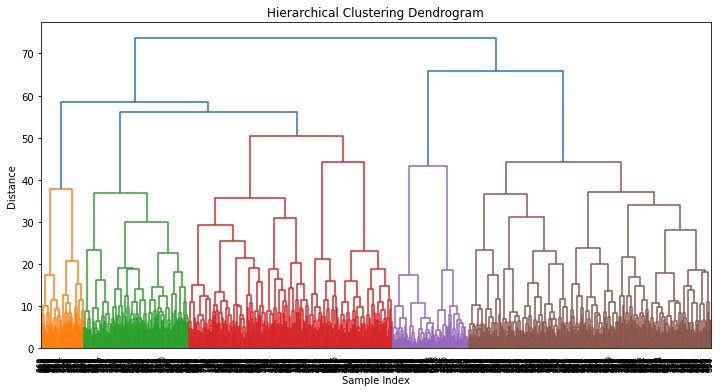

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:1000] / 255.0  # use the first 1000 samples

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Perform hierarchical clustering on the PCA components
Z = linkage(X_pca, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

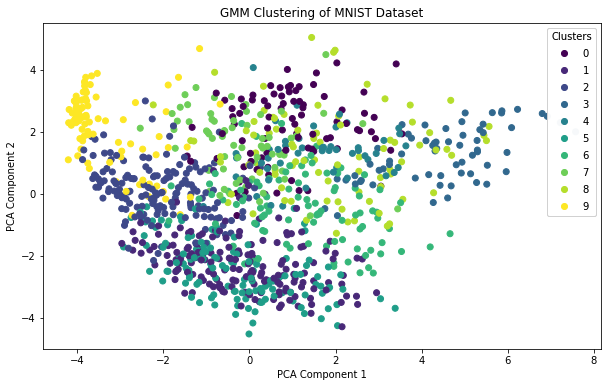

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:1000] / 255.0  # use the first 1000 samples

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Fit a Gaussian Mixture Model to the data
n_components = 10  # set the number of components for the GMM
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca)

# Assign cluster labels to the data
labels = gmm.predict(X_pca)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering of MNIST Dataset')
plt.show()